# RAG vs TLX3 combined ChiP-seq RNA-seq analysis

## NB! Change RNA analysis to TLX3_vs_RAG using featureCounts

### From Nicolas about RAG replicate 2

"Hello,

Oui je n'ai fait qu'une seule réplicate pour RAG TLX3. 
Je n'avais pas assez de souris pour en faire une deuxième, 
et surtout que ces cellules n'expriment pas TLX3 normalement. 
Et je ne pense pas que quelqu'un à part moi ai fait RAG TLX3. 
Sinon les résultats donnent quoi?

Nico"
$$c = \sqrt{a^2 + b^2}$$

%%latex
\section{First section}

\textbf{Hello}


\begin{equation} 
c = \sqrt{a^2 + b^2}
\end{equation}


\begin{itemize}
\item First item
\item Second item
\end{itemize}
\textbf{World}

In [3]:
import numpy as np
import yaml
import os
from os.path import join 
import pybedtools as pb
import gffutils
from pybedtools.featurefuncs import TSS
from gffutils.helpers import asinterval
import matplotlib.pyplot as plt
import metaseq
import pandas as pd

In [2]:
# make database from GTF
#~ db = gffutils.create_db("mouse.mm9.NCBIM37.67.ORIGINAL.gtf", "mouse.mm9.NCBIM37.67.ORIGINAL.gtf.db")

In [4]:
ref_dir = '../../references/mm9'
data_dir = 'tracks'
rel_path = "/home/sergio/media"

In [5]:
#db = gffutils.FeatureDB(join(ref_dir,'mm9.gtf.db'))

In [6]:
file_t = open(join(data_dir,"TLX3_list.yaml"), "r")
file_r = open(join(data_dir,"RAG_list.yaml"), "r")

tlx_lst = yaml.load(file_t)
rag_lst = yaml.load(file_r)

In [7]:
#def tss_generator():
#    """
#    Generator function to yield TSS of each annotated transcript
#    """
#    for transcript in db.features_of_type('transcript'):
#        yield TSS(asinterval(transcript), upstream=1, downstream=0)

# A BedTool made out of a generator, and saved to file.
#tsses = pb.BedTool(tss_generator()).saveas(join(ref_dir,'mm9_tsses.gtf'))


#Let's use pybedtools to add 1kb to either side of the TSS. This uses the BEDTools slop 
#routine; see the docs for that program for how to make changes to up/downstream distances.
#tsses_1kb = tsses.slop(b=1000, genome='mm9', output=join(ref_dir,'mm9_tsses-1kb.gtf'))
#tsses_2kb = tsses.slop(b=2000, genome='mm9', output=join(ref_dir,'mm9_tsses-2kb.gtf'))
#tsses_3kb = tsses.slop(b=3000, genome='mm9', output=join(ref_dir,'mm9_tsses-3kb.gtf'))
#tsses_5kb = tsses.slop(b=5000, genome='mm9', output=join(ref_dir,'mm9_tsses-5kb.gtf'))

In [8]:
tsses = pb.BedTool(join(ref_dir,'mm9_tsses.gtf'))
tsses_1kb = pb.BedTool(join(ref_dir,'mm9_tsses-1kb.gtf'))
tsses_3kb = pb.BedTool(join(ref_dir,'mm9_tsses-3kb.gtf'))
tsses_5kb = pb.BedTool(join(ref_dir,'mm9_tsses-5kb.gtf'))

In [9]:
# ---------------------------------------------------------
#~ Metaseq #
# ---------------------------------------------------------

#~ metaseq works with the concepts of signal and windows. In this example, the signal is ChIP data, 
#and the windows are TSS +/- 1kb.

#~ The first step is to create "genomic signal" objects out of the data. Since our example 
#files are BAM files, we specify the kind='bam', but if you have your own data 
#in a different format (bigWig, bigBed, BED, GFF, GTF, VCF) then specify that 
#format instead (see metaseq.genomic_signal()).

In [10]:
# ChiP-seq signals 

# TLX3
tlx_TLX3     = rel_path+tlx_lst["tracks"]["TLX3"][1]
tlx_H3K4me1  = rel_path+tlx_lst["tracks"]["H3K4me1"][1]
tlx_H3K4me2  = rel_path+tlx_lst["tracks"]["H3K4me2"][1]
tlx_H3K4me3  = rel_path+tlx_lst["tracks"]["H3K4me3"][1]
tlx_H3K9ac   = rel_path+tlx_lst["tracks"]["H3K9ac"][1]
tlx_H3K9me3  = rel_path+tlx_lst["tracks"]["H3K9me3"][1]
tlx_H3K27ac  = rel_path+tlx_lst["tracks"]["H3K27ac"][1]
tlx_H3K36me3 = rel_path+tlx_lst["tracks"]["H3K36me3"][1]
tlx_H3K27me3 = rel_path+tlx_lst["tracks"]["H3K27me3"][1]
tlx_POLII    = rel_path+tlx_lst["tracks"]["POLII"][1]

In [11]:
# RAG
rag_TLX3     = rel_path+rag_lst["tracks"]["TLX3"][1]
rag_H3K4me1  = rel_path+rag_lst["tracks"]["H3K4me1"][1]
rag_H3K4me2  = rel_path+rag_lst["tracks"]["H3K4me2"][0]
rag_H3K4me3  = rel_path+rag_lst["tracks"]["H3K4me3"][0]
rag_H3K9ac   = rel_path+rag_lst["tracks"]["H3K9ac"][0]
rag_H3K9me3  = rel_path+rag_lst["tracks"]["H3K9me3"][0]
rag_H3K27ac  = rel_path+rag_lst["tracks"]["H3K27ac"][1]
rag_H3K36me3 = rel_path+rag_lst["tracks"]["H3K36me3"][0]
rag_H3K27me3 = rel_path+rag_lst["tracks"]["H3K27me3"][0]
rag_POLII    = rel_path+rag_lst["tracks"]["POLII"][0]

In [12]:
tlx_TLX3_sig      = metaseq.genomic_signal(tlx_TLX3,'bigwig')
tlx_H3K4me1_sig   = metaseq.genomic_signal(tlx_H3K4me1,'bigwig')
tlx_H3K4me2_sig   = metaseq.genomic_signal(tlx_H3K4me2,'bigwig')
tlx_H3K4me3_sig   = metaseq.genomic_signal(tlx_H3K4me3,'bigwig')
tlx_H3K9ac_sig    = metaseq.genomic_signal(tlx_H3K9ac,'bigwig')
tlx_H3K9me3_sig   = metaseq.genomic_signal(tlx_H3K9me3,'bigwig')
tlx_H3K27ac_sig   = metaseq.genomic_signal(tlx_H3K27ac,'bigwig')
tlx_H3K36me3_sig  = metaseq.genomic_signal(tlx_H3K36me3,'bigwig')
tlx_H3K27me3_sig  = metaseq.genomic_signal(tlx_H3K27me3,'bigwig')
tlx_POLII_sig     = metaseq.genomic_signal(tlx_POLII,'bigwig')


In [13]:
rag_TLX3_sig      = metaseq.genomic_signal(rag_TLX3,'bigwig')
rag_H3K4me1_sig   = metaseq.genomic_signal(rag_H3K4me1,'bigwig')
rag_H3K4me2_sig   = metaseq.genomic_signal(rag_H3K4me2,'bigwig')
rag_H3K4me3_sig   = metaseq.genomic_signal(rag_H3K4me3,'bigwig')
rag_H3K9ac_sig    = metaseq.genomic_signal(rag_H3K9ac,'bigwig')
rag_H3K9me3_sig   = metaseq.genomic_signal(rag_H3K9me3,'bigwig')
rag_H3K27ac_sig   = metaseq.genomic_signal(rag_H3K27ac,'bigwig')
rag_H3K36me3_sig  = metaseq.genomic_signal(rag_H3K36me3,'bigwig')
rag_H3K27me3_sig  = metaseq.genomic_signal(rag_H3K27me3,'bigwig')
rag_POLII_sig     = metaseq.genomic_signal(rag_POLII,'bigwig')

In [14]:
import multiprocessing
processes = multiprocessing.cpu_count()

#rag_arr = rag_sig_bw.array(tsses_1kb, bins=100, processes=processes)

if  not os.path.exists('tlx-list1K.npz'):
    tlx_TLX3_arr     = tlx_TLX3_sig.array(tsses_1kb, bins=100, processes=processes)
    tlx_H3K4me1_arr  = tlx_H3K4me1_sig.array(tsses_1kb, bins=100, processes=processes)
    tlx_H3K4me2_arr  = tlx_H3K4me2_sig.array(tsses_1kb, bins=100, processes=processes)
    tlx_H3K4me3_arr  = tlx_H3K4me3_sig.array(tsses_1kb, bins=100, processes=processes)
    tlx_H3K9ac_arr   = tlx_H3K9ac_sig.array(tsses_1kb, bins=100, processes=processes)
    tlx_H3K9me3_arr  = tlx_H3K9me3_sig.array(tsses_1kb, bins=100, processes=processes)
    tlx_H3K27ac_arr  = tlx_H3K27ac_sig.array(tsses_1kb, bins=100, processes=processes)
    tlx_H3K36me3_arr = tlx_H3K36me3_sig.array(tsses_1kb, bins=100, processes=processes)
    tlx_H3K27me3_arr = tlx_H3K27me3_sig.array(tsses_1kb, bins=100, processes=processes)
    tlx_POLII_arr    = tlx_POLII_sig.array(tsses_1kb, bins=100, processes=processes)
        
    # Cache to disk. The data will be saved as "example.npz" and "example.features".
    metaseq.persistence.save_features_and_arrays(
            features=tsses,
            arrays= {'tlx-TLX3'     : tlx_TLX3_arr     ,
                     'tlx-H3K4me1'  : tlx_H3K4me1_arr  ,
                     'tlx-H3K4me2'  : tlx_H3K4me2_arr  ,
                     'tlx-H3K4me3'  : tlx_H3K4me3_arr  ,
                     'tlx-H3K9ac'   : tlx_H3K9ac_arr   ,
                     'tlx-H3K9me3'  : tlx_H3K9me3_arr  ,
                     'tlx-H3K27ac'  : tlx_H3K27ac_arr  ,
                     'tlx-H3K36me3' : tlx_H3K36me3_arr ,
                     'tlx-H3K27me3' : tlx_H3K27me3_arr ,
                     'tlx-POLII'    : tlx_POLII_arr},    
            prefix='tlx-list1K',
            link_features=False,
            overwrite=True)

if  not os.path.exists('tlx-list3K.npz'):
    tlx_TLX3_arr     = tlx_TLX3_sig.array(tsses_3kb, bins=100, processes=processes)
    tlx_H3K4me1_arr  = tlx_H3K4me1_sig.array(tsses_3kb, bins=100, processes=processes)
    tlx_H3K4me2_arr  = tlx_H3K4me2_sig.array(tsses_3kb, bins=100, processes=processes)
    tlx_H3K4me3_arr  = tlx_H3K4me3_sig.array(tsses_3kb, bins=100, processes=processes)
    tlx_H3K9ac_arr   = tlx_H3K9ac_sig.array(tsses_3kb, bins=100, processes=processes)
    tlx_H3K9me3_arr  = tlx_H3K9me3_sig.array(tsses_3kb, bins=100, processes=processes)
    tlx_H3K27ac_arr  = tlx_H3K27ac_sig.array(tsses_3kb, bins=100, processes=processes)
    tlx_H3K36me3_arr = tlx_H3K36me3_sig.array(tsses_3kb, bins=100, processes=processes)
    tlx_H3K27me3_arr = tlx_H3K27me3_sig.array(tsses_3kb, bins=100, processes=processes)
    tlx_POLII_arr    = tlx_POLII_sig.array(tsses_3kb, bins=100, processes=processes)
        
    # Cache to disk. The data will be saved as "example.npz" and "example.features".
    metaseq.persistence.save_features_and_arrays(
            features=tsses,
            arrays= {'tlx-TLX3'     : tlx_TLX3_arr     ,
                     'tlx-H3K4me1'  : tlx_H3K4me1_arr  ,
                     'tlx-H3K4me2'  : tlx_H3K4me2_arr  ,
                     'tlx-H3K4me3'  : tlx_H3K4me3_arr  ,
                     'tlx-H3K9ac'   : tlx_H3K9ac_arr   ,
                     'tlx-H3K9me3'  : tlx_H3K9me3_arr  ,
                     'tlx-H3K27ac'  : tlx_H3K27ac_arr  ,
                     'tlx-H3K36me3' : tlx_H3K36me3_arr ,
                     'tlx-H3K27me3' : tlx_H3K27me3_arr ,
                     'tlx-POLII'    : tlx_POLII_arr},    
            prefix='tlx-list3K',
            link_features=False,
            overwrite=True)

In [15]:
if  not os.path.exists('rag-list1K.npz'):
    rag_TLX3_arr     = rag_TLX3_sig.array(tsses_1kb, bins=100, processes=processes)
    rag_H3K4me1_arr  = rag_H3K4me1_sig.array(tsses_1kb, bins=100, processes=processes)
    rag_H3K4me2_arr  = rag_H3K4me2_sig.array(tsses_1kb, bins=100, processes=processes)
    rag_H3K4me3_arr  = rag_H3K4me3_sig.array(tsses_1kb, bins=100, processes=processes)
    rag_H3K9ac_arr   = rag_H3K9ac_sig.array(tsses_1kb, bins=100, processes=processes)
    rag_H3K9me3_arr  = rag_H3K9me3_sig.array(tsses_1kb, bins=100, processes=processes)
    rag_H3K27ac_arr  = rag_H3K27ac_sig.array(tsses_1kb, bins=100, processes=processes)
    rag_H3K36me3_arr = rag_H3K36me3_sig.array(tsses_1kb, bins=100, processes=processes)
    rag_H3K27me3_arr = rag_H3K27me3_sig.array(tsses_1kb, bins=100, processes=processes)
    rag_POLII_arr    = rag_POLII_sig.array(tsses_1kb, bins=100, processes=processes)
        
    # Cache to disk. The data will be saved as "example.npz" and "example.features".
    metaseq.persistence.save_features_and_arrays(
            features=tsses,
            arrays= {'rag-TLX3'     : rag_TLX3_arr     ,
                     'rag-H3K4me1'  : rag_H3K4me1_arr  ,
                     'rag-H3K4me2'  : rag_H3K4me2_arr  ,
                     'rag-H3K4me3'  : rag_H3K4me3_arr  ,
                     'rag-H3K9ac'   : rag_H3K9ac_arr   ,
                     'rag-H3K9me3'  : rag_H3K9me3_arr  ,
                     'rag-H3K27ac'  : rag_H3K27ac_arr  ,
                     'rag-H3K36me3' : rag_H3K36me3_arr ,
                     'rag-H3K27me3' : rag_H3K27me3_arr ,
                     'rag-POLII'    : rag_POLII_arr},    
            prefix='rag-list1K',
            link_features=False,
            overwrite=True)

if  not os.path.exists('rag-list3K.npz'):
    rag_TLX3_arr     = rag_TLX3_sig.array(tsses_3kb, bins=100, processes=processes)
    rag_H3K4me1_arr  = rag_H3K4me1_sig.array(tsses_3kb, bins=100, processes=processes)
    rag_H3K4me2_arr  = rag_H3K4me2_sig.array(tsses_3kb, bins=100, processes=processes)
    rag_H3K4me3_arr  = rag_H3K4me3_sig.array(tsses_3kb, bins=100, processes=processes)
    rag_H3K9ac_arr   = rag_H3K9ac_sig.array(tsses_3kb, bins=100, processes=processes)
    rag_H3K9me3_arr  = rag_H3K9me3_sig.array(tsses_3kb, bins=100, processes=processes)
    rag_H3K27ac_arr  = rag_H3K27ac_sig.array(tsses_3kb, bins=100, processes=processes)
    rag_H3K36me3_arr = rag_H3K36me3_sig.array(tsses_3kb, bins=100, processes=processes)
    rag_H3K27me3_arr = rag_H3K27me3_sig.array(tsses_3kb, bins=100, processes=processes)
    rag_POLII_arr    = rag_POLII_sig.array(tsses_3kb, bins=100, processes=processes)
        
    # Cache to disk. The data will be saved as "example.npz" and "example.features".
    metaseq.persistence.save_features_and_arrays(
            features=tsses,
            arrays= {'rag-TLX3'     : rag_TLX3_arr     ,
                     'rag-H3K4me1'  : rag_H3K4me1_arr  ,
                     'rag-H3K4me2'  : rag_H3K4me2_arr  ,
                     'rag-H3K4me3'  : rag_H3K4me3_arr  ,
                     'rag-H3K9ac'   : rag_H3K9ac_arr   ,
                     'rag-H3K9me3'  : rag_H3K9me3_arr  ,
                     'rag-H3K27ac'  : rag_H3K27ac_arr  ,
                     'rag-H3K36me3' : rag_H3K36me3_arr ,
                     'rag-H3K27me3' : rag_H3K27me3_arr ,
                     'rag-POLII'    : rag_POLII_arr},    
            prefix='rag-list3K',
            link_features=False,
            overwrite=True)

In [16]:
#print tlx_signal.mapped_read_count()


In [69]:
features, arrays = metaseq.persistence.load_features_and_arrays(prefix='tlx-list1K')
features3K, arrays3K = metaseq.persistence.load_features_and_arrays(prefix='tlx-list3K')
features_rag, arrays_rag = metaseq.persistence.load_features_and_arrays(prefix='rag-list1K')
features3K_rag, arrays3K_rag = metaseq.persistence.load_features_and_arrays(prefix='rag-list3K')
#features5K, arrays5K = metaseq.persistence.load_features_and_arrays(prefix='tlx-vs-rag_tlx3_5Kb')

In [70]:
# For scaling use  c = (b+min(b))*(abs(max(a)-min(a)))/(abs(max(b)-min(b)))-min(a)

In [71]:
# This ought to be exactly the same as the number of features in `tsses_1kb.gtf`
#assert len(features) == len(tsses_1kb) 

# This shows that `arrays` acts like a dictionary
#assert sorted(arrays.keys()) == ['rag', 'tlx']
#print sorted(arrays.keys())


In [72]:
#print arrays['tlx'].shape
#print arrays['tlx'][50550:50650,50]


In [92]:
# ---------------------------------------------------------
#~ Line plot of average signal
# ---------------------------------------------------------

# Enable in-line plots for this example
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Tweak some font settings so the results look nicer
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12



# TLX3  average signals around TSS

In [93]:
#~ Now that we have NumPy arrays of signal over windows, there’s a lot we can do. 
#~ One easy thing is to simply plot the mean signal of IP and of input. Let’s construct 
#~ meaningful values for the x-axis, from -1000 to +1000 over 100 bins. 
#~ We’ll do this with a NumPy array.

x = np.linspace(-1000, 1000, 100)

arr_t = arrays['tlx-POLII']
ar  = arrays_rag['rag-POLII']


In [94]:
k1 = np.min(ar)
k2 = (abs(np.max(arr_t)-np.min(arr_t)))/(abs(np.max(ar)-np.min(ar)))
k3 = np.min(arr_t)
print k1, k2, k3

-676.546691895 0.0949218641186 -135.622105408


In [95]:
#arr_r =  (ar-k1)*k2 +k3
#arr_r =  ar*k2-k1*k2 +k3


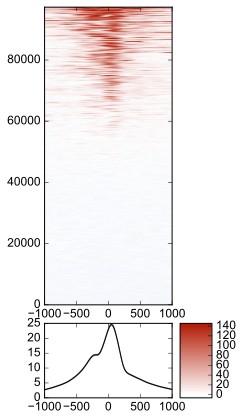

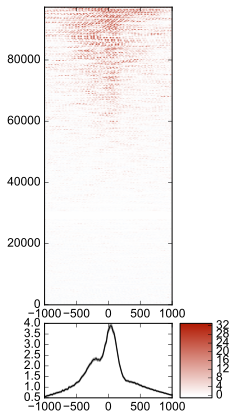

In [101]:
fig2 = metaseq.plotutils.imshow(
     arr_t,
     x=x,
     figsize=(3, 7),
     vmin=5, vmax=99,  percentile=True,
     line_kwargs=dict(color='k', label='All'),
     fill_kwargs=dict(color='k', alpha=0.3),
     sort_by=arr_t.mean(axis=1)
)



fig2 = metaseq.plotutils.imshow(
     ar*k2,
     x=x,
     figsize=(3, 7),
     vmin=5, vmax=99.,  percentile=True,
     line_kwargs=dict(color='k', label='All'),
     fill_kwargs=dict(color='k', alpha=0.3),
     sort_by=ar.mean(axis=1)
)

In [18]:
# 3K around TSS
#~ features3K, arrays3K = metaseq.persistence.load_features_and_arrays(prefix='tlx-list3K')
#~ x3 = np.linspace(-3000, 3000, 100)



#~ fig2 = metaseq.plotutils.imshow(
    #~ arrays3K['tlx-TLX3'],
    #~ x=x3,
    #~ figsize=(3, 7),
    #~ vmin=5, vmax=99,  percentile=True,
    #~ line_kwargs=dict(color='k', label='All'),
    #~ fill_kwargs=dict(color='k', alpha=0.3),
    #~ sort_by=arrays['tlx-TLX3'].mean(axis=1)
#~ )

#~ #
#~ fig2.line_axes.set_ylabel('Average enrichment');
#~ fig2.line_axes.set_xlabel('Distance from TSS (bp)');
#~ fig2.array_axes.set_ylabel('Transcripts on all chromosomes')

#~ # Remove the x tick labels, 
#~ #fig2.array_axes.set_xticklabels([])

#~ # Add a vertical line 
#~ fig2.array_axes.axvline(0, linestyle=':', color='k')
#~ fig2.line_axes.axvline(0, linestyle=':', color='k')

#~ fig2.cax.set_ylabel("Enrichment")
#~ fig2.array_axes.set_title("TLX3_TLX3")

#~ fig3 = metaseq.plotutils.imshow(
    #~ arrays3K['tlx-H3K4me3'],
    #~ x=x3,
    #~ figsize=(3, 7),
    #~ vmin=5, vmax=99,  percentile=True,
    #~ line_kwargs=dict(color='k', label='All'),
    #~ fill_kwargs=dict(color='k', alpha=0.3),
    #~ sort_by=arrays['tlx-H3K4me3'].mean(axis=1)
#~ )

#~ fig3.line_axes.set_ylabel('Average enrichment');
#~ fig3.line_axes.set_xlabel('Distance from TSS (bp)');
#~ fig3.array_axes.set_ylabel('Transcripts on all chromosomes')
#~ #fig3.array_axes.set_xticklabels([])
#~ fig3.array_axes.axvline(0, linestyle=':', color='k')
#~ fig3.line_axes.axvline(0, linestyle=':', color='k')
#~ fig3.cax.set_ylabel("Enrichment")
#~ fig3.array_axes.set_title("TLX3_H3K4me3")

#~ fig4 = metaseq.plotutils.imshow(
    #~ arrays3K['tlx-H3K9me3'],
    #~ x=x3,
    #~ figsize=(3, 7),
    #~ vmin=5, vmax=99,  percentile=True,
    #~ line_kwargs=dict(color='k', label='All'),
    #~ fill_kwargs=dict(color='k', alpha=0.3),
    #~ sort_by=arrays['tlx-H3K9me3'].mean(axis=1)
#~ )

#~ fig4.line_axes.set_ylabel('Average enrichment');
#~ fig4.line_axes.set_xlabel('Distance from TSS (bp)');
#~ fig4.array_axes.set_ylabel('Transcripts on all chromosomes')
#~ #fig4.array_axes.set_xticklabels([])
#~ fig4.array_axes.axvline(0, linestyle=':', color='k')
#~ fig4.line_axes.axvline(0, linestyle=':', color='k')
#~ fig4.cax.set_ylabel("Enrichment")
#~ fig4.array_axes.set_title("TLX3_H3K9me3")

# RNA-seq data wrangling: aligning RNA-seq data with ChIP-seq data

In [103]:
from metaseq.results_table import ResultsTable, DESeq2Results

# RNA-seq expression tables
tlx_tabf = rel_path+tlx_lst["table"][0]
#rag_tabf = rel_path+rag_lst["table"][0]
print tlx_tabf

tlx_vs_rag_table = ResultsTable(tlx_tabf, import_kwargs=dict(index_col=0))

#tlx_fC_tb = ResultsTable(tlx_tabff, import_kwargs=dict(index_col=0, header=1))
#rag_fC_tb = ResultsTable(rag_tabff, import_kwargs=dict(index_col=0, header=1))


/home/sergio/media/NAS3B/Bioinfoplatform/PFlab/RNA-Seq/RNA-SEQ_ANALYSIS/31-featureCounts/TLX3vsRAG_DESeq2-results.txt


In [34]:
tlx_vs_rag_table.scatter?

In [20]:
#
# TLX
#print tlx_vs_rag_table.columns
tlx_vs_rag_table.data['TLX3'] = (tlx_vs_rag_table.data['TLX3.1_1']+tlx_vs_rag_table.data['TLX3.1_5']+tlx_vs_rag_table.data['TLX3.1_P'])/3.
tlx_vs_rag_table.data['RAG'] = (tlx_vs_rag_table.data['R2.RAG1W.RAG1']+tlx_vs_rag_table.data['RAGS.RAGZ']+tlx_vs_rag_table.data['RAGZ'])/3.
tlx_vs_rag_table.data.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,R2.RAG1W.RAG1,RAGS.RAGZ,RAGZ,TLX3.1_1,TLX3.1_5,TLX3.1_P,TLX3,RAG
Gene,,,,,,,,,,,,,,
ENSMUST00000103276,27433.105054,12.922264,0.319513,40.443580,0.000000e+00,0.000000e+00,10.177853,3.674556,4.499572,53775.677331,52859.665274,57944.935741,54860.092782,6.117327
ENSMUST00000103553,3762.700677,4.555680,0.128053,35.576653,3.217765e-277,7.871458e-273,303.978550,304.069541,308.670611,7628.708031,7078.494566,6952.282764,7219.828454,305.572901
ENSMUST00000001327,21480.430278,3.850095,0.114815,33.532982,1.594072e-246,2.599666e-242,2857.262664,2862.479424,2612.451264,40286.996090,40462.516498,39800.875728,40183.462772,2777.397784
ENSMUST00000058845,4942.878826,4.063601,0.121378,33.478977,9.751199e-246,1.192694e-241,571.316828,561.288488,534.549105,8956.218330,9427.633982,9606.266226,9330.039513,555.718140
ENSMUST00000109488,3293.419234,-7.777488,0.232803,-33.408033,1.048078e-244,1.025544e-240,7110.248267,5760.785772,6801.552411,37.088438,25.321444,25.519072,29.309651,6557.528817


In [ ]:
# ---------------------------------------------------------
# Re-align the ResultsTables to match the GTF file
tlx_vs_rag_table = tlx_vs_rag_table.reindex_to(tsses, attribute='transcript_id')

In [40]:
print tsses[3000]['transcript_id'] 
print tlx_vs_rag_table.data.index[3000]

ENSMUST00000153123
ENSMUST00000153123


In [22]:
# Everything should be the same length
#assert len(tlx_table.data) == len(rag_table.data) == len(tsses_1kb) 

# Spot-check some values to make sure the GTF file and the DataFrame match up.
assert tsses[0]['transcript_id'] == tlx_vs_rag_table.data.index[0]
assert tsses[100]['transcript_id'] == tlx_vs_rag_table.data.index[100]
assert tsses[5000]['transcript_id'] == tlx_vs_rag_table.data.index[5000]

In [23]:
# ---------------------------------------------------------
# How many transcriptschanged expression?

print "up regulated from DEG:", sum(tlx_vs_rag_table.log2FoldChange > 1)
print "down regulated from DEG:", sum(tlx_vs_rag_table.log2FoldChange < -1)

up regulated from DEG: 8372
down regulated from DEG: 18420


# Scatterplots of RNA-seq and TLX3_TLX3 ChIP-seq signal

In [24]:
# ChiP-Seq signal in charge
charr = arrays['tlx-TLX3']
chname = "TLX3-TLX3"

# Convert to ResultsTable so we can take advantage of its
# `scatter` method
rt = ResultsTable(tlx_vs_rag_table.data)

# Get the up/down regulated
up = rt.log2FoldChange > 1
dn = rt.log2FoldChange < -1



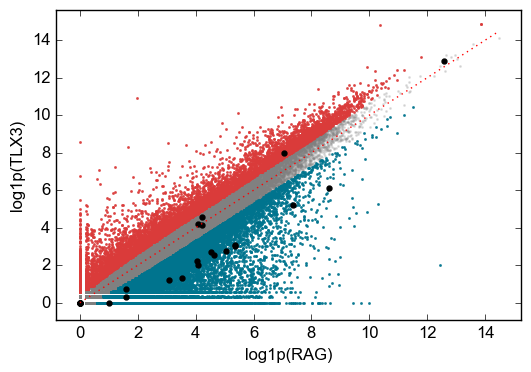

In [25]:
%config InlineBackend.figure_format = 'png'
# Go back to the ChIP-seq data and create a boolean array
# that is True only for the top TSSes with the strongest
# mean signal



tss_means = charr.mean(axis=1)
strongest_signal = np.zeros(len(tss_means)) == 1
strongest_signal[np.argsort(tss_means)[-25:]] = True


rt.scatter(
    x='RAG',
    y='TLX3',
    xfunc=np.log1p,
    yfunc=np.log1p,
    genes_to_highlight=[
        (up, dict(color='#da3b3a', alpha=0.8)),
        (dn, dict(color='#00748e', alpha=0.8)),
        (strongest_signal, dict(color='k', s=50, alpha=1)),

    ],
    general_kwargs=dict(marker='.', color='0.5', alpha=0.2, s=5),
    one_to_one=dict(color='r', linestyle=':')
);
#plt.savefig("test.pdf", format='pdf')

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:1290: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  positions.sort()
/usr/lib/python2.7/dist-packages/matplotlib/collections.py:1295: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  positions.sort()


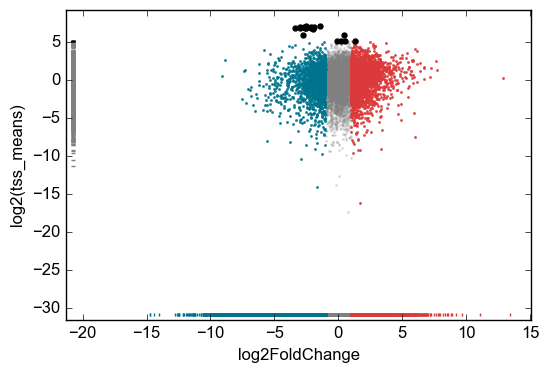

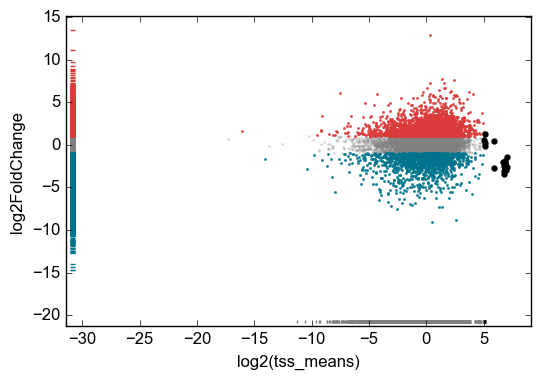

In [26]:
# Perhaps a better analysis would be to plot average
# ChIP-seq signal vs log2foldchange directly. In an imaginary
# world where biology is simple, we might expect TSSes with stronger
# log2foldchange upon knockdown to have stronger ChIP-seq signal
# in the control.
#
# To take advantage of the `scatter` method of ResultsTable objects,
# we simply add the TSS signal means as another variable in the
# dataframe. Then we can refer to it by name in `scatter`.
#
# We'll also use the same colors and genes to highlight from
# above.


rt.data['tss_means'] = tss_means
rt.scatter(
    x='log2FoldChange',
    y='tss_means',
    genes_to_highlight=[
        (up, dict(color='#da3b3a', alpha=0.8)),
        (dn, dict(color='#00748e', alpha=0.8)),
        (strongest_signal, dict(color='k', s=50, alpha=1)),
    ],
    general_kwargs=dict(marker='.', color='0.5', alpha=0.2, s=5),
    yfunc=np.log2);

rt.data['tss_means'] = tss_means
rt.scatter(
    x='tss_means',
    y='log2FoldChange',
    genes_to_highlight=[
        (up, dict(color='#da3b3a', alpha=0.8)),
        (dn, dict(color='#00748e', alpha=0.8)),
        (strongest_signal, dict(color='k', s=50, alpha=1)),
    ],
    general_kwargs=dict(marker='.', color='0.5', alpha=0.2, s=5),
    xfunc=np.log2);

# Integrating RNA-seq data with the heatmap

In [27]:
arrays.keys()

['tlx-POLII',
 'tlx-TLX3',
 'tlx-H3K27ac',
 'tlx-H3K36me3',
 'tlx-H3K9me3',
 'tlx-H3K4me1',
 'tlx-H3K4me2',
 'tlx-H3K4me3',
 'tlx-H3K9ac',
 'tlx-H3K27me3']

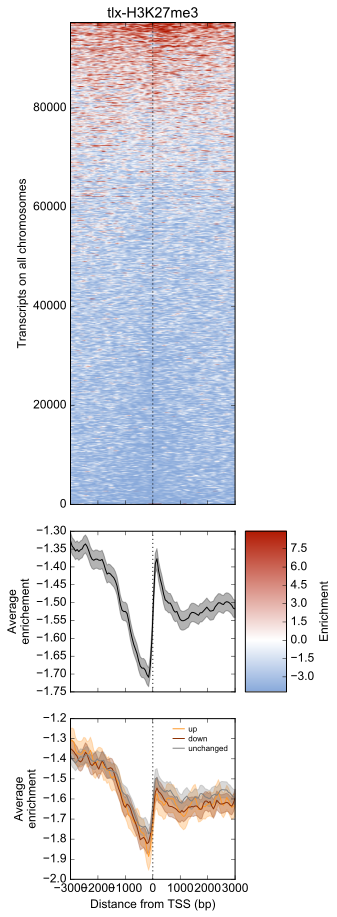

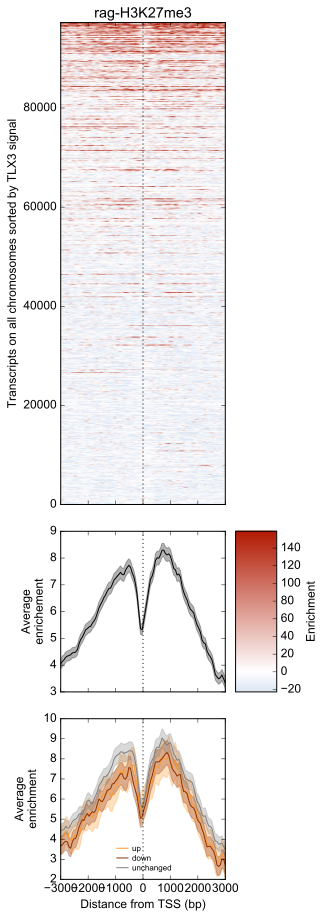

In [104]:
['tlx-POLII',
 'tlx-TLX3',
 'tlx-H3K27ac',
 'tlx-H3K36me3',
 'tlx-H3K9me3',
 'tlx-H3K4me1',
 'tlx-H3K4me2',
 'tlx-H3K4me3',
 'tlx-H3K9ac',
 'tlx-H3K27me3']

key_single = ['tlx-H3K27me3']

x3 = np.linspace(-3000, 3000, 100)
#charr = arrays['tlx-TLX3']
#chname = "TLX3-TLX3"

#for chname in arrays3K.keys():
#    charr = arrays3K[chname]
#    xx = x3 

for chname in key_single: #arrays3K.keys():
    chnameR = 'rag'+chname[3:]
    
    charr = arrays3K[chname]
    charrR = arrays3K_rag[chnameR]
    
    up = charr[(tlx_vs_rag_table.log2FoldChange > 1).values, :]
    down = charr[(tlx_vs_rag_table.log2FoldChange < -1).values, :]
    unchn =  charr[((tlx_vs_rag_table.log2FoldChange >= -1) & (tlx_vs_rag_table.log2FoldChange <= 1)).values, :]
    
    upR = charrR[(tlx_vs_rag_table.log2FoldChange > 1).values, :]
    downR = charrR[(tlx_vs_rag_table.log2FoldChange < -1).values, :]
    unchnR =  charrR[((tlx_vs_rag_table.log2FoldChange >= -1) & (tlx_vs_rag_table.log2FoldChange <= 1)).values, :]
    
    xx = x3 
    
    fig = metaseq.plotutils.imshow(
        # Same as before...
        charr,
        x=xx,
        figsize=(6, 14),
        vmin=5, vmax=99,  percentile=True,
        line_kwargs=dict(color='k', label='All'),
        fill_kwargs=dict(color='k', alpha=0.3),
        sort_by=charr.mean(axis=1),
        # Default was (3,1); here we add another number
        height_ratios=(3, 1, 1)
    )

    # `fig.gs` contains the `matplotlib.gridspec.GridSpec` object,
    # so we can now create the new axes.
    bottom_axes = plt.subplot(fig.gs[2, 0])
    # Signal over TSSs of transcripts that were activated upon knockdown.
    metaseq.plotutils.ci_plot(
        xx,
        up,
        line_kwargs=dict(color='#fe9829', label='up'),
        fill_kwargs=dict(color='#fe9829', alpha=0.3),
        ax=bottom_axes)

    # Signal over TSSs of transcripts that were repressed upon knockdown
    metaseq.plotutils.ci_plot(
        xx,
        down,
        line_kwargs=dict(color='#8e3104', label='down'),
        fill_kwargs=dict(color='#8e3104', alpha=0.3),
        ax=bottom_axes)

    # Signal over TSSs tof transcripts that did not change upon knockdown
    metaseq.plotutils.ci_plot(
        xx,
        unchn,
        line_kwargs=dict(color='.5', label='unchanged'),
        fill_kwargs=dict(color='.5', alpha=0.3),
        ax=bottom_axes);
    
    # Clean up redundant x tick labels, and add axes labels
    fig.line_axes.set_xticklabels([])
    fig.array_axes.set_xticklabels([])
    fig.line_axes.set_ylabel('Average\nenrichement')
    fig.array_axes.set_ylabel('Transcripts on all chromosomes')
    bottom_axes.set_ylabel('Average\nenrichment')
    bottom_axes.set_xlabel('Distance from TSS (bp)')
    fig.cax.set_ylabel('Enrichment')
    fig.array_axes.set_title(chname)

    # Add the vertical lines for TSS position to all axes
    for ax in [fig.line_axes, fig.array_axes, bottom_axes]:
        ax.axvline(0, linestyle=':', color='k')

    # Nice legend
    bottom_axes.legend(loc='best', frameon=False, fontsize=8, labelspacing=.3, handletextpad=0.2)
    fig.subplots_adjust(left=0.3, right=0.8, bottom=0.05)

    #plt.savefig("results/"+chname+"-1K.svg", format="svg")
    #plt.savefig("results/"+chname+"-1K.pdf", format="pdf")
    plt.savefig("results/"+chname+"-3K.pdf", format="pdf")
    
    fig = metaseq.plotutils.imshow(
        # Same as before...
        charrR,
        x=xx,
        figsize=(6, 14),
        vmin=5, vmax=99,  percentile=True,
        line_kwargs=dict(color='k', label='All'),
        fill_kwargs=dict(color='k', alpha=0.3),
        sort_by=charr.mean(axis=1),
        # Default was (3,1); here we add another number
        height_ratios=(3, 1, 1)
    )

    # `fig.gs` contains the `matplotlib.gridspec.GridSpec` object,
    # so we can now create the new axes.
    bottom_axes = plt.subplot(fig.gs[2, 0])
    # Signal over TSSs of transcripts that were activated upon knockdown.
    metaseq.plotutils.ci_plot(
        xx,
        upR,
        line_kwargs=dict(color='#fe9829', label='up'),
        fill_kwargs=dict(color='#fe9829', alpha=0.3),
        ax=bottom_axes)

    # Signal over TSSs of transcripts that were repressed upon knockdown
    metaseq.plotutils.ci_plot(
        xx,
        downR,
        line_kwargs=dict(color='#8e3104', label='down'),
        fill_kwargs=dict(color='#8e3104', alpha=0.3),
        ax=bottom_axes)

    # Signal over TSSs tof transcripts that did not change upon knockdown
    metaseq.plotutils.ci_plot(
        xx,
        unchnR,
        line_kwargs=dict(color='.5', label='unchanged'),
        fill_kwargs=dict(color='.5', alpha=0.3),
        ax=bottom_axes);
    
    # Clean up redundant x tick labels, and add axes labels
    fig.line_axes.set_xticklabels([])
    fig.array_axes.set_xticklabels([])
    fig.line_axes.set_ylabel('Average\nenrichement')
    fig.array_axes.set_ylabel('Transcripts on all chromosomes sorted by TLX3 signal')
    bottom_axes.set_ylabel('Average\nenrichment')
    bottom_axes.set_xlabel('Distance from TSS (bp)')
    fig.cax.set_ylabel('Enrichment')
    fig.array_axes.set_title(chnameR)

    # Add the vertical lines for TSS position to all axes
    for ax in [fig.line_axes, fig.array_axes, bottom_axes]:
        ax.axvline(0, linestyle=':', color='k')

    # Nice legend
    bottom_axes.legend(loc='best', frameon=False, fontsize=8, labelspacing=.3, handletextpad=0.2)
    fig.subplots_adjust(left=0.3, right=0.8, bottom=0.05)

    #plt.savefig("results/"+chnameR+"-1K.svg", format="svg")
    #plt.savefig("results/"+chnameR+"-1K.pdf", format="pdf")
    plt.savefig("results/"+chnameR+"-tlx-3K.pdf", format="pdf")

# ngs.plot.r

In [122]:
# ngs.plot can also accept bam-pairs for plotting. A bam-pair is a pair of bam files separated 
# by colon, such as ChIP vs. Input.

#print "ngs.plot.r -G mm9 -R tss -C " + tlx_bam + ":" + tlx_inp + " -O hesc.TLX3_TLX3vsInput.tss -T TLX3_TLX3 -L 3000"

#print "ngs.plot.r -G mm9 -R tss -C " + rag_bam + ":" + rag_inp + " -O hesc.RAG_TLX3vsInput.tss -T RAG_TLX3 -L 3000"


# K-means clustering of ChIP-seq signal (not working prop)

# Top 200 from ChiP-seq

In [163]:
## Sort features for feature analysis. Not used for below
# sorting features by TLX strength around TSS
tlx_mean = charr.mean(axis=1)
tlx_mean_srt = np.sort(tlx_mean)[::-1]
sort_indices = np.argsort(tlx_mean)[::-1]

# if you have a streaming BedTool, "render" it to a tempfile with
# saveas()
#sort_tlx_features = pb.BedTool(tsses[i] for i in sort_indices).saveas('sort_tlx-TLX3_features.gtf')
#sort_tlx_features = pb.BedTool('sort_tlx-TLX3_features.gtf')
#sort_indices


In [164]:
top200 = rt.data.iloc[sort_indices[:200]]


In [165]:
gene_names = pd.read_table("tracks/UCSC_mm9_transcripID_to_geneSymbol.sort.txt", index_col=0,names=["Geneid", "Gene_name"])

In [167]:
gene_names.head(20)

,Gene_name
Geneid,
ENSMUST00000000001,Gnai3
ENSMUST00000000003,Pbsn
ENSMUST00000000010,Hoxb9
ENSMUST00000000028,Cdc45
ENSMUST00000000033,Igf2
ENSMUST00000000049,Apoh
ENSMUST00000000058,Cav2
ENSMUST00000000080,Klf6
ENSMUST00000000087,Scmh1


In [168]:
top200names = gene_names.loc[top200.index]

In [169]:
top200all = top200names.join(top200)

In [171]:
top200all.head(20)

,Gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,R2.RAG1W.RAG1,RAGS.RAGZ,RAGZ,TLX3.1_1,TLX3.1_5,TLX3.1_P,TLX3,RAG,tss_means
Gene,,,,,,,,,,,,,,,,
ENSMUST00000173714,Neat1,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.858794
ENSMUST00000115128,Mll5,46.827870,-0.364538,0.331957,-1.098147,2.721401e-01,3.780046e-01,46.818125,58.792902,53.094945,29.414968,51.793863,41.052420,40.753750,52.901991,0.994891
ENSMUST00000094962,Mll5,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.994891
ENSMUST00000098789,Zc3h4,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.293212
ENSMUST00000079583,Zc3h4,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.293212
ENSMUST00000130263,Gabpb1,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000771
ENSMUST00000124972,Gabpb1,0.894024,0.398969,1.635277,0.243976,8.072490e-01,8.629386e-01,2.035571,0.000000,0.000000,0.000000,0.000000,3.328575,1.109525,0.678524,0.984271
ENSMUST00000045897,Ptma,162309.389028,1.763351,0.143356,12.300521,8.999129e-35,4.091844e-33,76929.642905,80330.395767,63939.812170,255036.725797,260924.819446,236694.938087,250885.494443,73733.283614,4.853637
ENSMUST00000103228,Gabpb1,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.849423


In [172]:
top200all?


In [42]:
#arrays_rag.keys()

['rag-H3K27ac',
 'rag-POLII',
 'rag-H3K27me3',
 'rag-H3K4me2',
 'rag-H3K4me3',
 'rag-H3K9ac',
 'rag-H3K4me1',
 'rag-H3K36me3',
 'rag-TLX3',
 'rag-H3K9me3']